In [1]:
from __future__ import print_function
import json
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
json_data=open('../json.data/contest_v1.json')
data = json.load(json_data)
json_data.close()

json_rank=open('../json.data/contest_ranklist.json')
rank = json.load(json_rank)
json_rank.close()

json_op=open('../json.data/contest_out_operators.json')
op = json.load(json_op)
json_op.close()

In [3]:
len(data)

8048

In [4]:
data[0]

{'filename': '1542501099.cpp',
 'nloc': 28,
 'token_count': 285,
 'problem': 'https://www.codeforces.com/contest/868/problem/B',
 'solution': 'https://www.codeforces.com/contest/868/submission/45891140',
 'exec_time': '31 ms',
 'memory': '300 KB',
 'usertype': 'Candidate',
 'function_count': 1,
 'library_count': 1,
 'used_headers': 1,
 'macro_count': 10,
 'used_macros': 5,
 'function_details': [{'cyclomatic_complexity': 18,
   'nloc': 18,
   'token_count': 222,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 33,
   'end_line': 67,
   'parameters': [],
   'filename': '1542501099.cpp',
   'top_nesting_level': 0,
   'length': 35,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [7]:
print(type(rank),type(op))
print(op[0])

<class 'dict'> <class 'list'>
{'filename': '1542501099.cpp', 'operators': 10, 'boolean_operators': 10, 'binary_operators': 0}


In [8]:
set1 = set([])
data_uniq = []
for x in data:
    if x['solution'] not in set1:
        set1.add(x['solution'])
        data_uniq.append(x)
data = data_uniq[:]
print(len(data))

7943


In [11]:
#Check for order of files in data and op are same or not
for i in range(len(data)):
    if not data[i]['filename']==op[i]['filename']:
        print(i,data[i]['filename'], op[i]['filename'])
        print('No')
        break

2 1542501110.cpp 1542501106.cpp
No


In [54]:
i = 0
file_order = {}
for x in op:
    file_order[x['filename']] = i
    i += 1

In [55]:
op[file_order['1542501099.cpp']]['operators']

10

In [69]:
up_1 = 0
up_2 = 0
down_1 = 0
down_2 = 0
function_count = []
nloc = []
token_count = []
library_count = []
used_library = []
used_library_per = []
macro_count = []
used_macro = []
used_macro_per = []
usertype = []
mat_op = []
logical_op = []
bit_op = []
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
main_div1 = ['Expert','Master','Candidate','International']
main_div2 = ['Newbie','Pupil','Specialist']
user_rank = []
userdiv = []
for x in data:
    if x['token_count'] > 0 and x['usertype'] in main_cat:
        json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
        tmp = json.load(json_tmp)
        try:
            user_rank.append(rank[tmp['username']])
            if int(user_rank[-1])<=900:
                userdiv.append('Upper')
                if (x['usertype'] in main_div1):
                    up_1 += 1
                else:
                    up_2 += 1
            else:
                userdiv.append('Lower')
                if (x['usertype'] in main_div1):
                    down_1 += 1
                else:
                    down_2 += 1
            function_count.append(x['function_count'])
            nloc.append(x['nloc'])
            token_count.append(x['token_count'])
            macro_count.append(x['macro_count'])
            used_macro.append(x['used_macros'])
            library_count.append(x['library_count'])
            used_library.append(x['used_headers'])
            used_macro_per.append(0 if x['macro_count']==0 else (x['used_macros']/x['macro_count'])*100)
            used_library_per.append(100 if x['library_count']==0 else (x['used_headers']/x['library_count'])*100)
            usertype.append(x['usertype'])
#             print(x['filename'])
            mat_op.append(op[file_order[x['filename']]]['operators'])
            logical_op.append(op[file_order[x['filename']]]['boolean_operators'])
            bit_op.append(op[file_order[x['filename']]]['binary_operators'])
        except Exception as e:
            pass
        json_tmp.close()
print(len(user_rank))

5113


In [71]:
print('Upper',userdiv.count('Upper'))
print('1',up_1,'2',up_2)
print('Lower',userdiv.count('Lower'))
print('1',down_1,'2',down_2)

Upper 2558
1 1950 2 608
Lower 2555
1 677 2 1878


In [72]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [73]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [74]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [75]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [76]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [77]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [78]:
def plot_data_1D_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    Y = []
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hlines(1,1,np.max(data)+np.max(data)*0.5)
        
        Y = np.ones(len(data))
        
        ax[i].plot(data,Y,'|',ms = 40,c = c[i%6],label=x)
        ax[i].legend(loc="upper right")
    plt.title(title,y=2.4)

In [79]:
def plot_data_2D_cat(X,Y,C,title='Title'):
    c = ['b','r','m','g','c','y']
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    cat = []
    plot = []
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        point = []
        for y,z,w in zip(X,Y,C):
            if w == x:
                data.append(y)
                point.append(z)
    
        l = ax[i].scatter(data,point,c=c[i%6],alpha=0.2)
        plot.append(l)
        cat.append(x)
    plt.title(title,y=2.4) 
    plt.legend(plot,cat,bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [80]:
def plot_frequency_cat(X,C,title='Title',l=False):
    c = ['b','r','m','g','c','y']
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left',label=x,color=c[i%6],log=l)
        ax[i].legend(prop={'size':10})
    plt.title(title,y=2.4)
#     plt.legend(plot,cat)

In [81]:
def box_plot_cat(X,C,title='Title'):
    l = [[]]*len(set(C))
    label = [[]]*len(set(C))
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        l[i] = data
        label[i] = x
    fig = plt.figure(1, figsize=(9, 6))
    plt.title(title)
    ax = fig.add_subplot(111)
    bp = ax.boxplot(l)
    ax.set_xticklabels(label)

In [82]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[9.0, 12.0]


[9.0, 12.0]

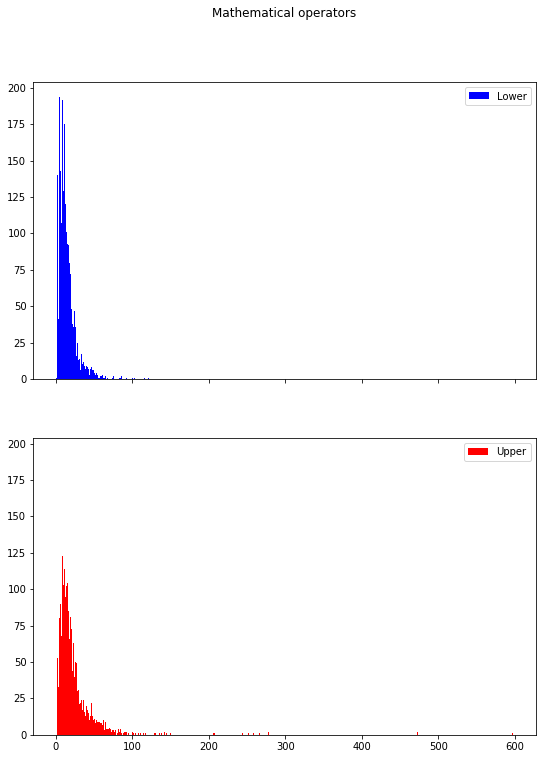

In [83]:
plot_frequency_cat(mat_op,userdiv,'Arithmetic operators')

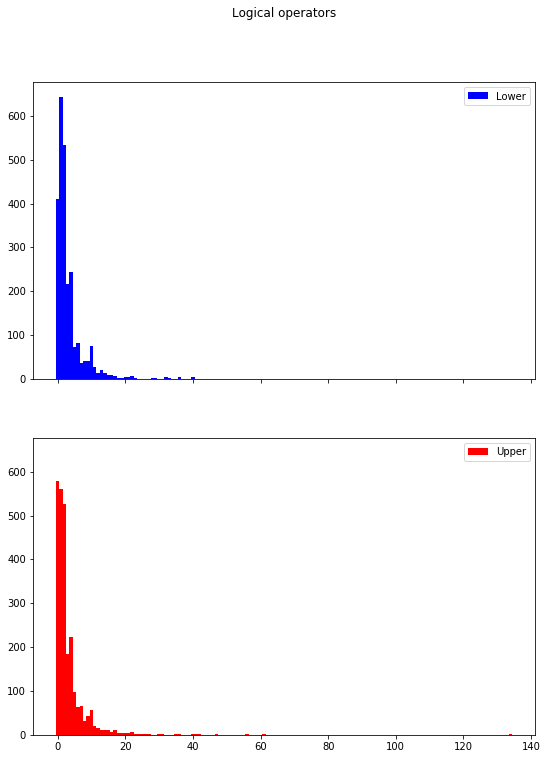

In [84]:
plot_frequency_cat(logical_op,userdiv,'Logical operators')

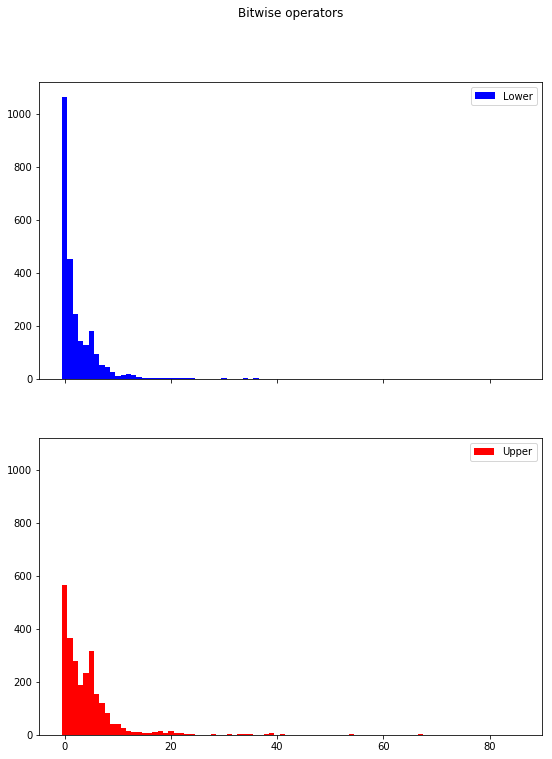

In [85]:
plot_frequency_cat(bit_op,userdiv,'Bitwise operators')

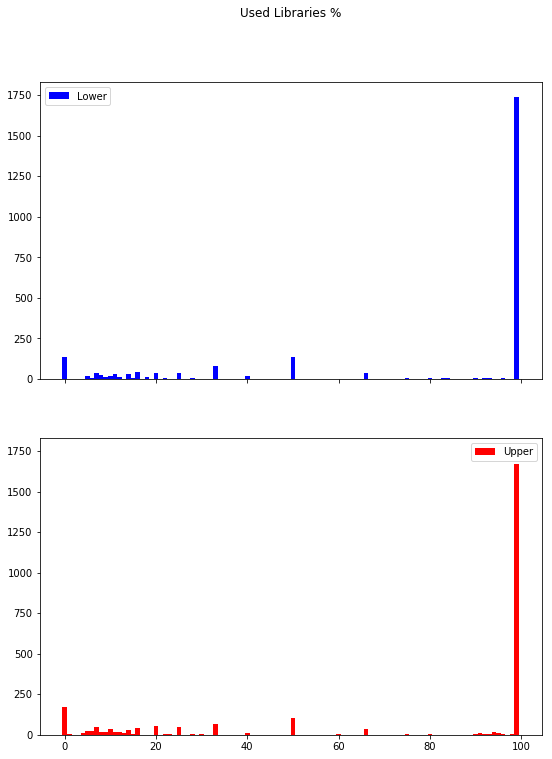

In [37]:
plot_frequency_cat(used_library_per,userdiv,'Used Libraries %')

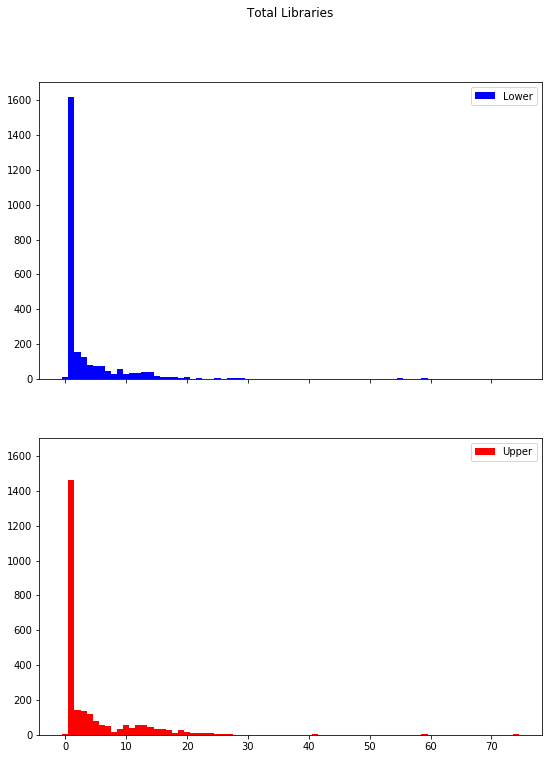

In [38]:
plot_frequency_cat(library_count,userdiv,'Total Libraries')

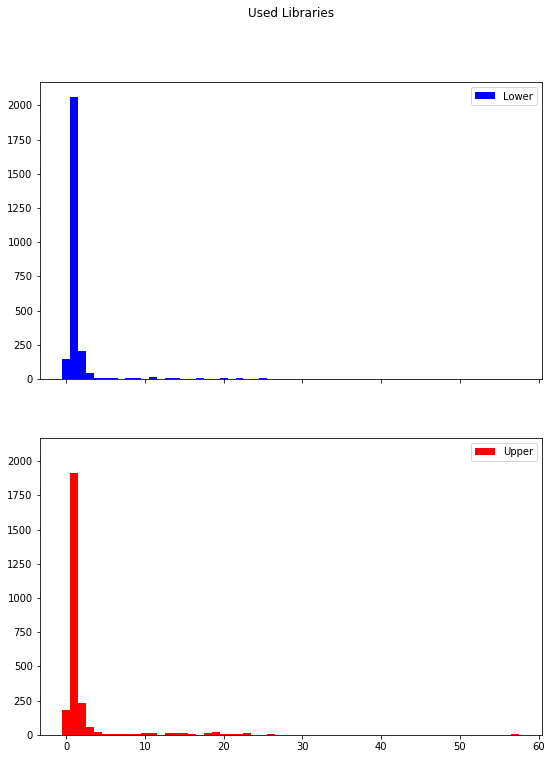

In [24]:
plot_frequency_cat(used_library,userdiv,'Used Libraries')

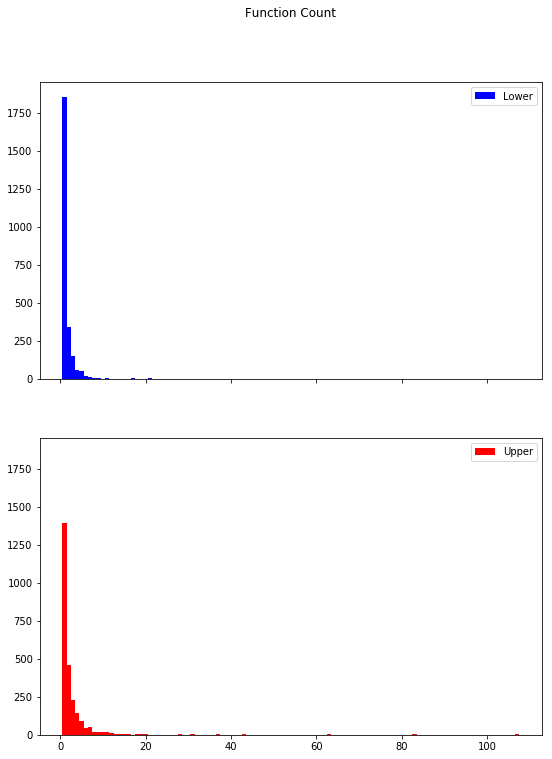

In [25]:
plot_frequency_cat(function_count,userdiv,'Function Count')

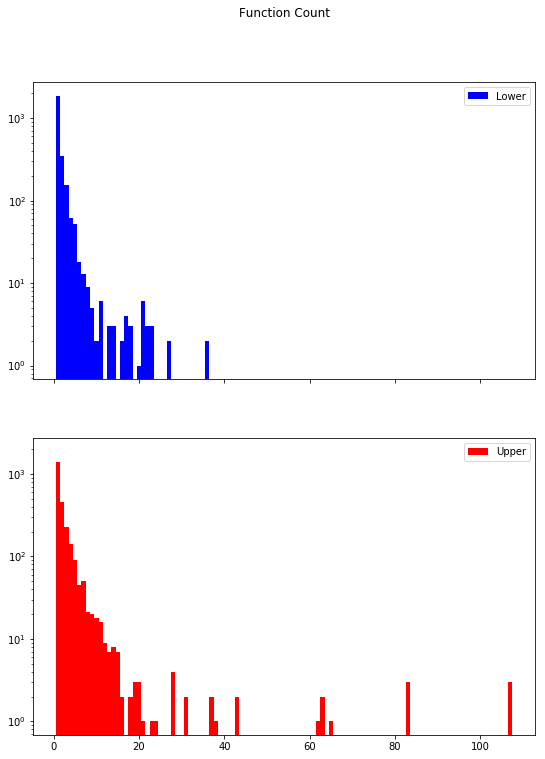

In [26]:
plot_frequency_cat(function_count,userdiv,'Function Count',True)

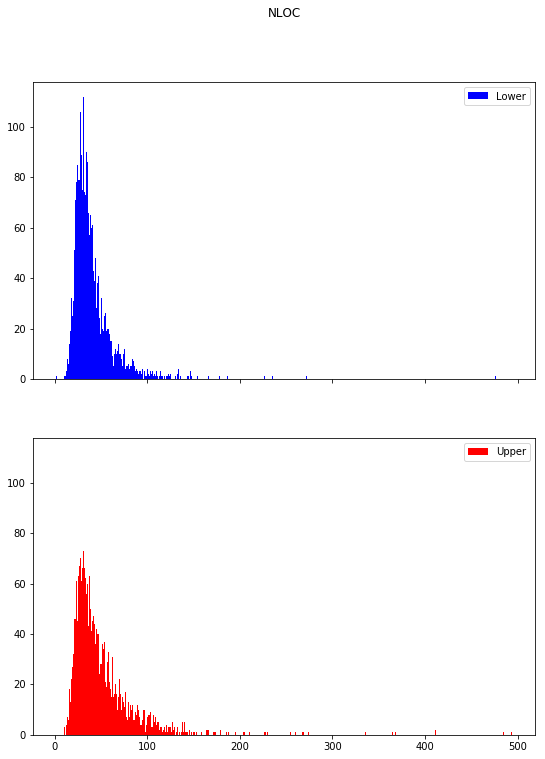

In [27]:
plot_frequency_cat(nloc,userdiv,'NLOC')

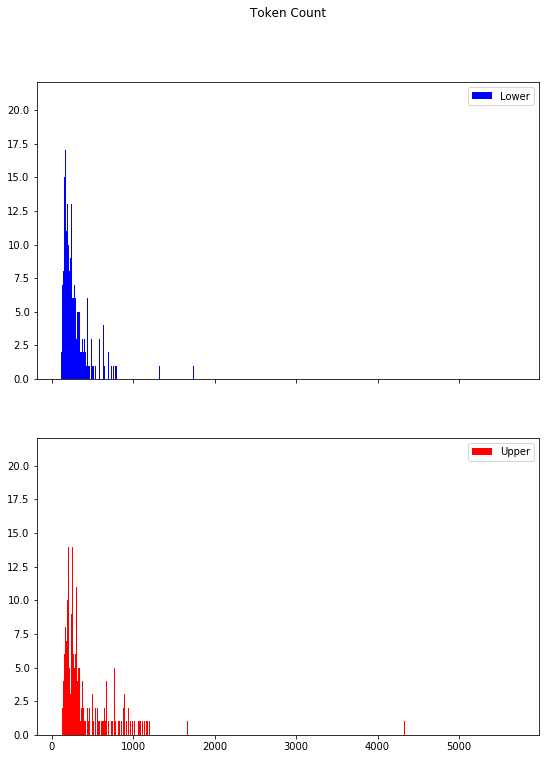

In [28]:
plot_frequency_cat(token_count,userdiv,'Token Count')

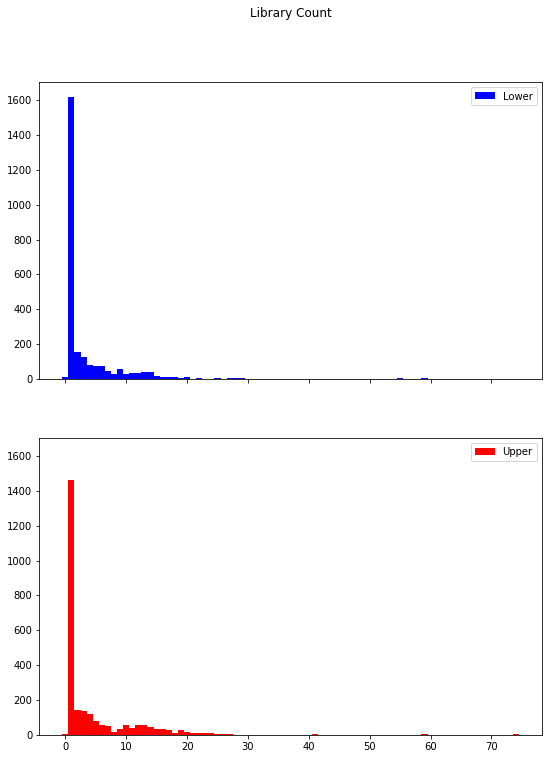

In [29]:
plot_frequency_cat(library_count,userdiv,'Library Count')

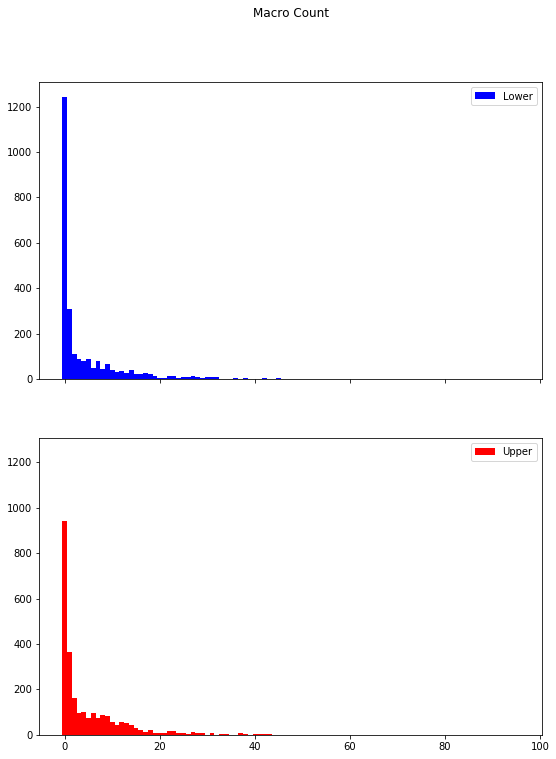

In [30]:
plot_frequency_cat(macro_count,userdiv,'Macro Count')

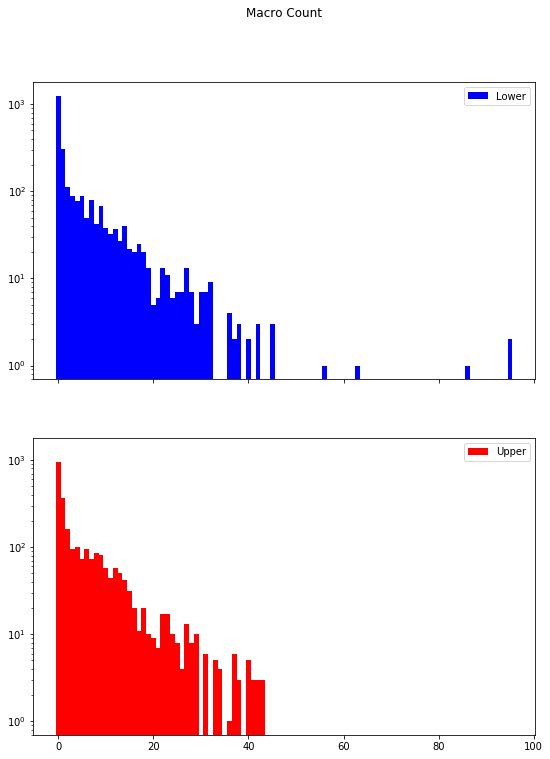

In [31]:
plot_frequency_cat(macro_count,userdiv,'Macro Count',True)

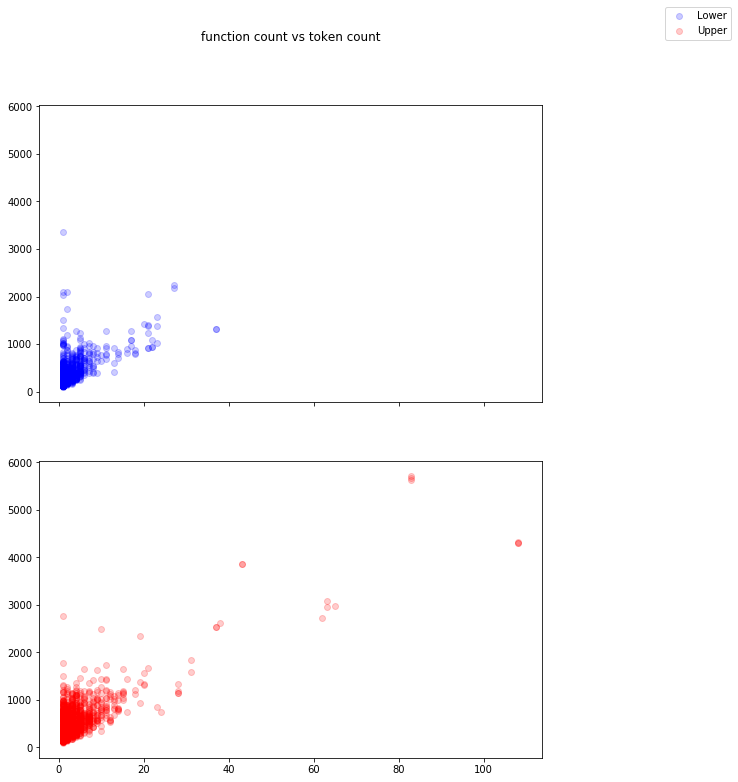

In [32]:
plot_data_2D_cat(function_count,token_count,userdiv,'function count vs token count')

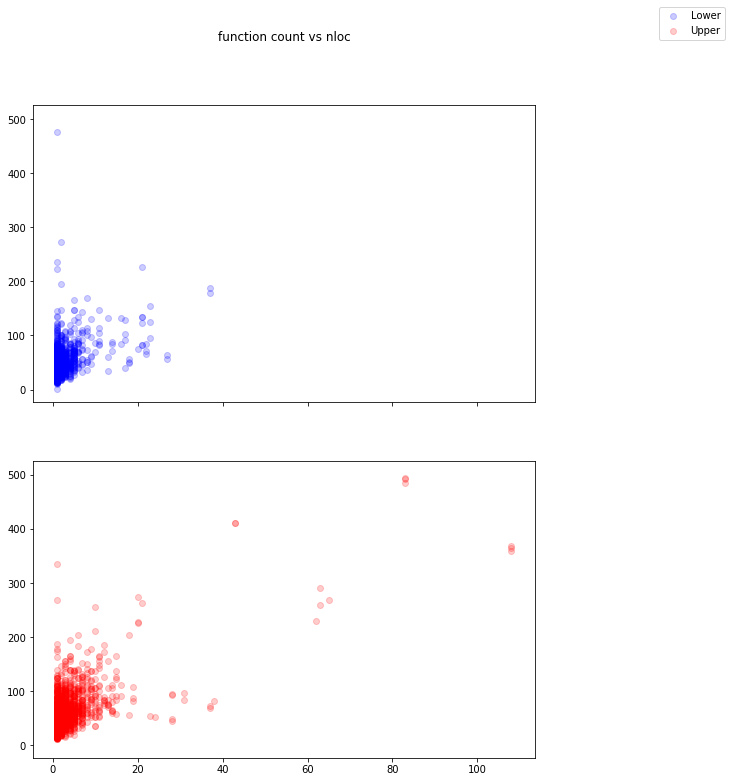

In [33]:
plot_data_2D_cat(function_count,nloc,userdiv,'function count vs nloc')

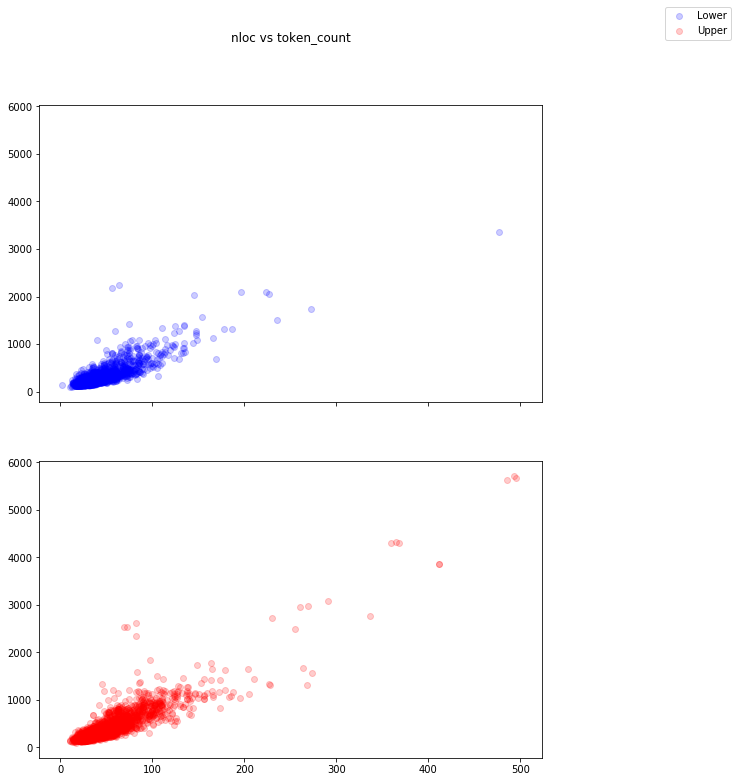

In [34]:
plot_data_2D_cat(nloc,token_count,userdiv,'nloc vs token_count')

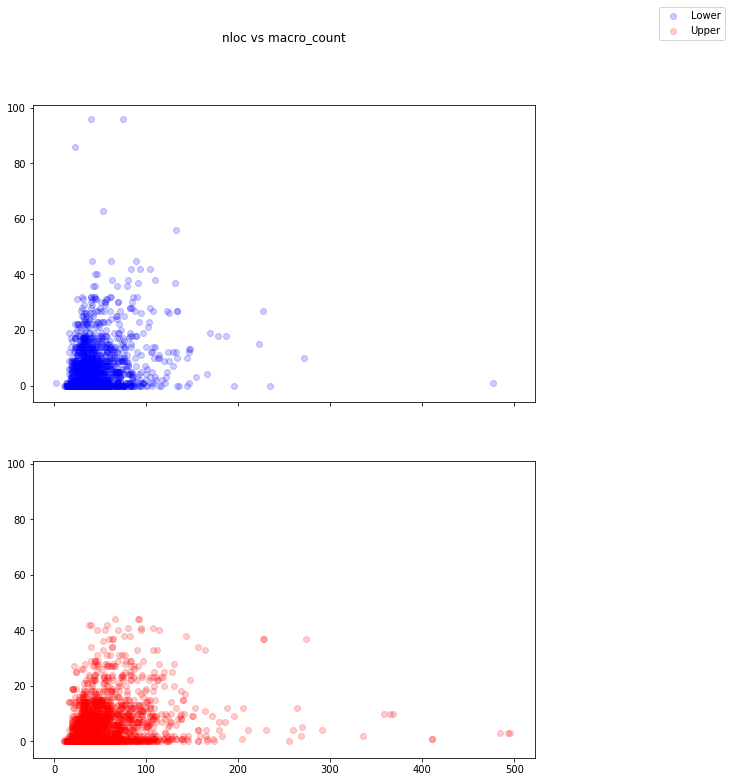

In [35]:
plot_data_2D_cat(nloc,macro_count,userdiv,'nloc vs macro_count')

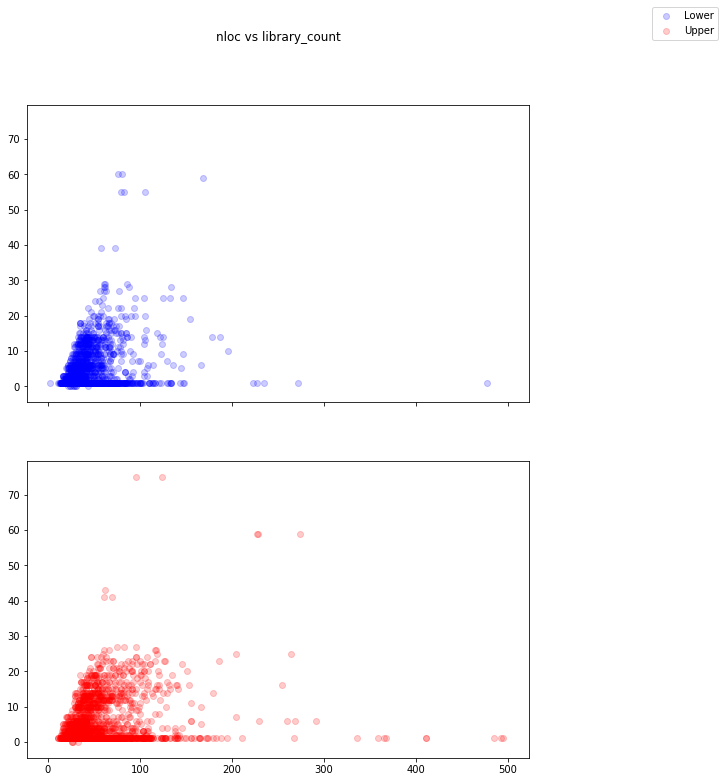

In [36]:
plot_data_2D_cat(nloc,library_count,userdiv,'nloc vs library_count')

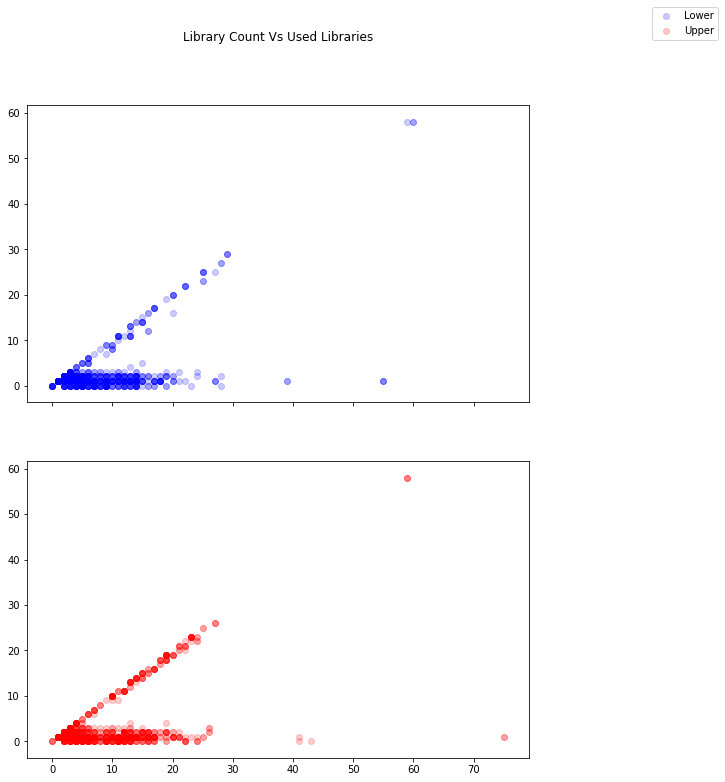

In [37]:
plot_data_2D_cat(library_count,used_library,userdiv,'Library Count Vs Used Libraries')

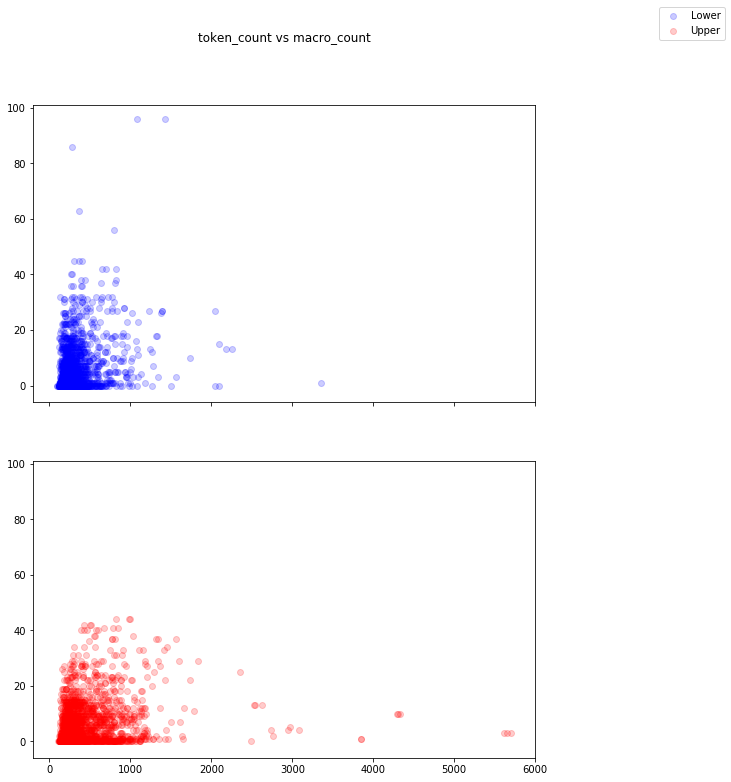

In [38]:
plot_data_2D_cat(token_count,macro_count,userdiv,'token_count vs macro_count')

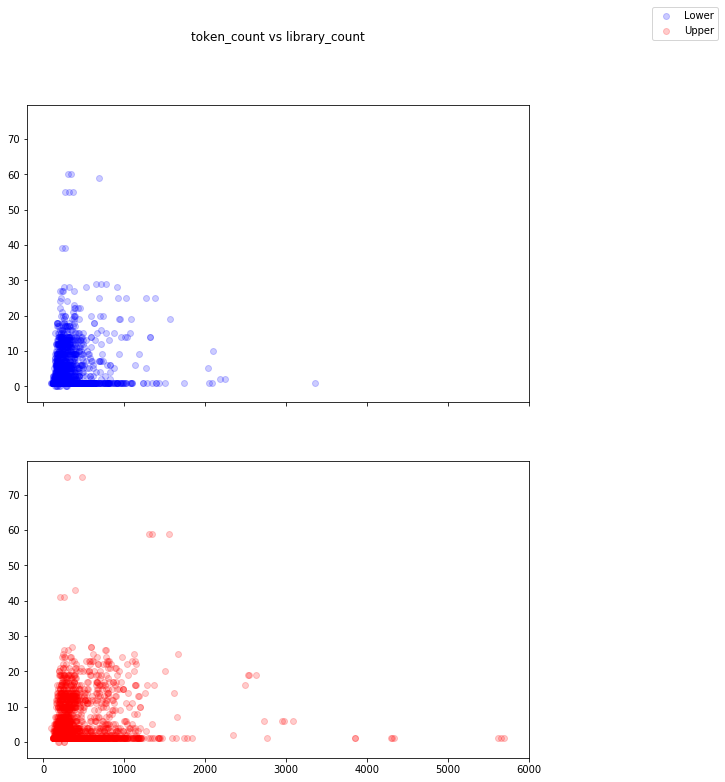

In [39]:
plot_data_2D_cat(token_count,library_count,userdiv,'token_count vs library_count')

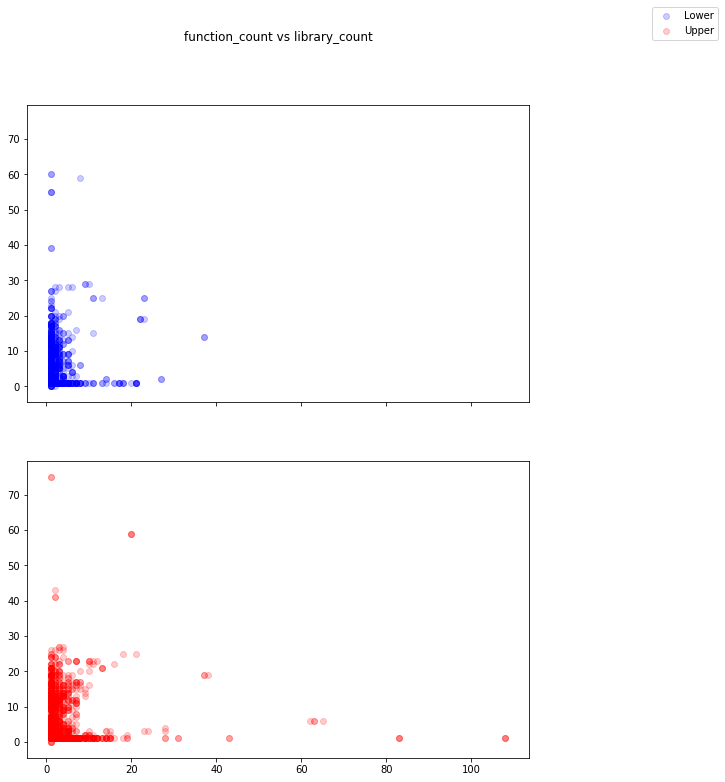

In [40]:
plot_data_2D_cat(function_count,library_count,userdiv,'function_count vs library_count')

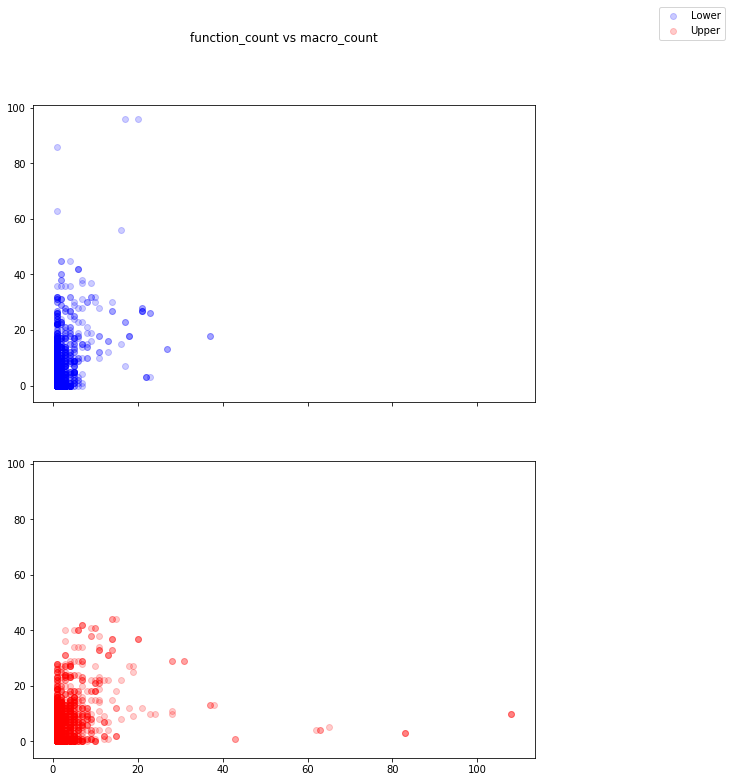

In [41]:
plot_data_2D_cat(function_count,macro_count,userdiv,'function_count vs macro_count')

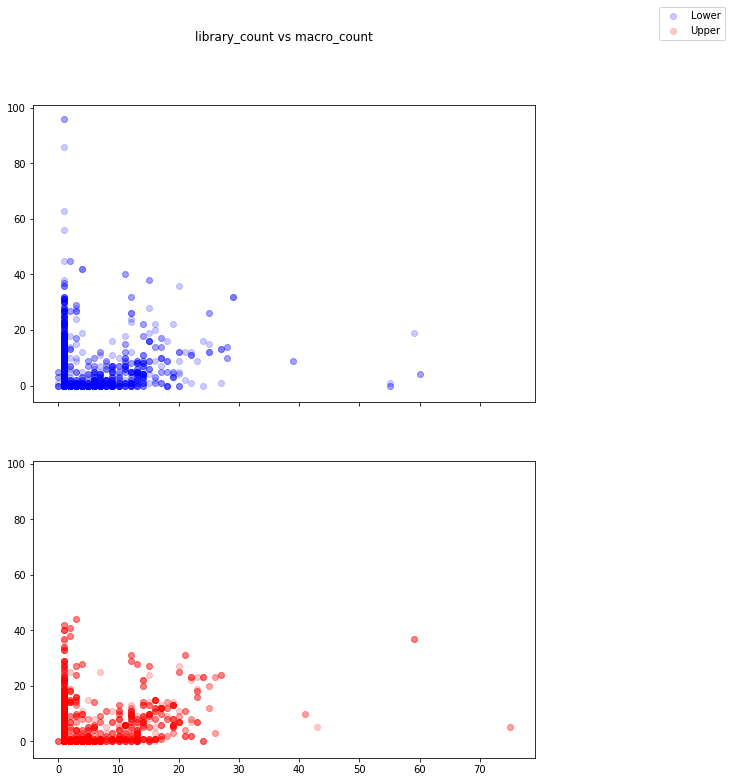

In [42]:
plot_data_2D_cat(library_count,macro_count,userdiv,'library_count vs macro_count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


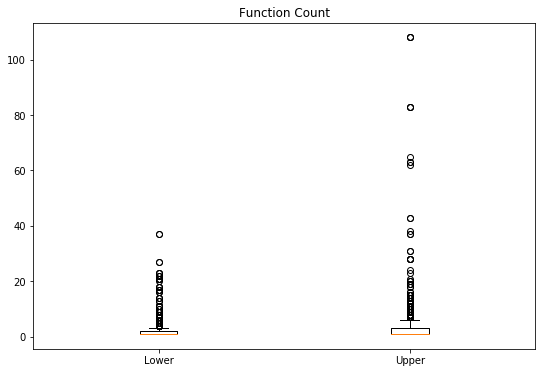

In [43]:
box_plot_cat(function_count,userdiv,'Function Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


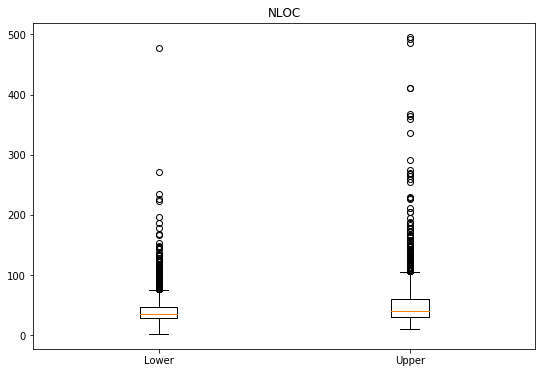

In [44]:
box_plot_cat(nloc,userdiv,'NLOC')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


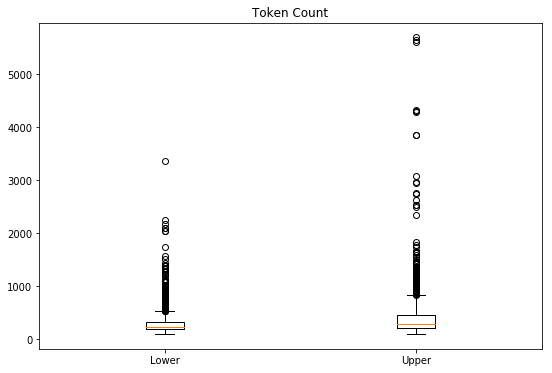

In [45]:
box_plot_cat(token_count,userdiv,'Token Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


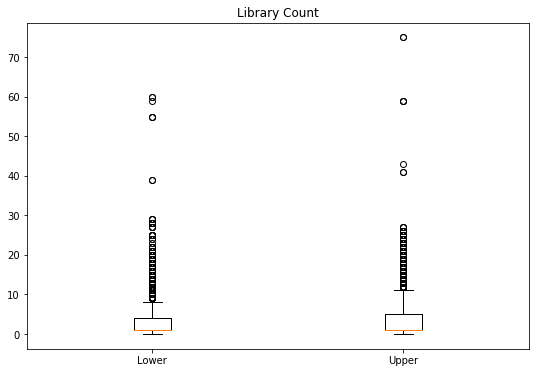

In [46]:
box_plot_cat(library_count,userdiv,'Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


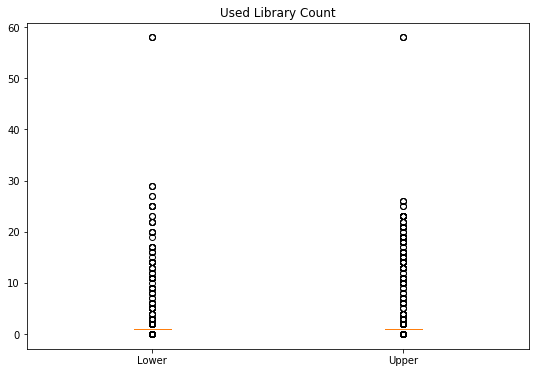

In [47]:
box_plot_cat(used_library,userdiv,'Used Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


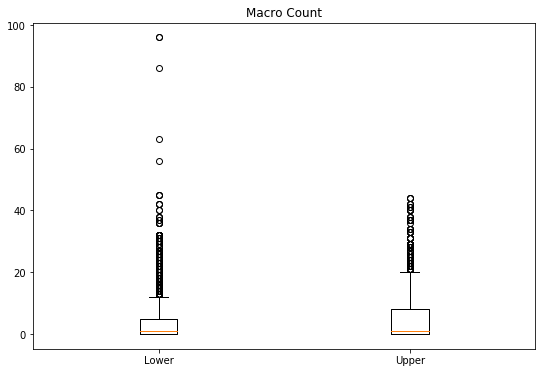

In [48]:
box_plot_cat(macro_count,userdiv,'Macro Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


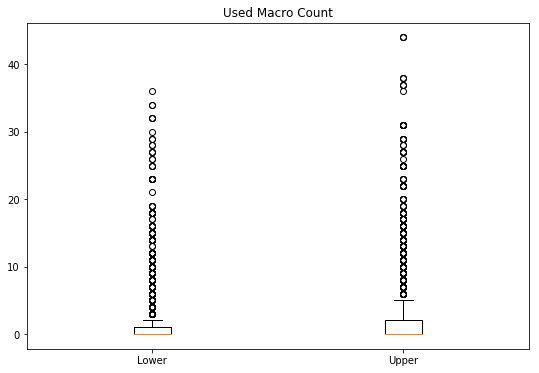

In [51]:
box_plot_cat(used_macro,userdiv,'Used Macro Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


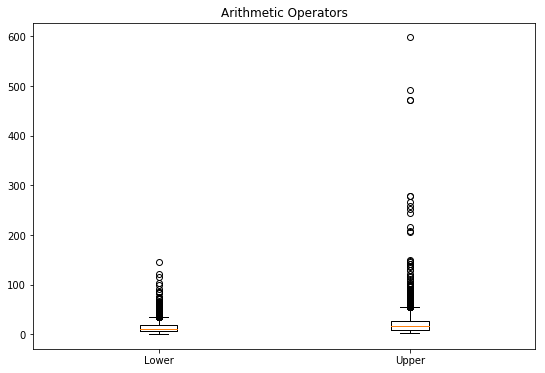

In [86]:
box_plot_cat(mat_op,userdiv,'Arithmetic Operators')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


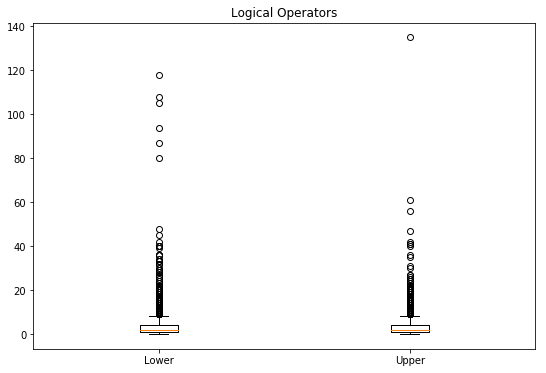

In [87]:
box_plot_cat(logical_op,userdiv,'Logical Operators')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


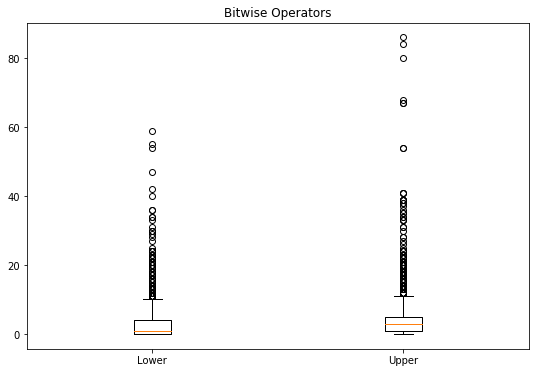

In [88]:
box_plot_cat(bit_op,userdiv,'Bitwise Operators')